In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='darkgrid')

In [20]:
df = pd.read_csv("StudentsPerformance_modified.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
5,female,group B,associate's degree,standard,none,71,83.0,78.0
6,female,group B,some college,standard,completed,88,95.0,92.0
7,male,group B,some college,free/reduced,none,40,43.0,39.0
8,male,group D,high school,free/reduced,completed,64,64.0,67.0
9,female,group B,high school,free/reduced,none,38,60.0,50.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [22]:
df = df.dropna(how="any",axis=0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       978 non-null    object 
 1   race/ethnicity               978 non-null    object 
 2   parental level of education  978 non-null    object 
 3   lunch                        978 non-null    object 
 4   test preparation course      978 non-null    object 
 5   math score                   978 non-null    object 
 6   reading score                978 non-null    float64
 7   writing score                978 non-null    float64
dtypes: float64(2), object(6)
memory usage: 68.8+ KB


In [24]:
df['math score'].value_counts()

?     35
65    35
62    33
59    31
69    29
      ..
0      1
33     1
19     1
23     1
8      1
Name: math score, Length: 85, dtype: int64

### Droping rows having math score value as '?'

In [25]:
df.drop(df.index[df['math score'] == "?"],inplace=True)

In [26]:
df = df.astype({"math score" : float})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       943 non-null    object 
 1   race/ethnicity               943 non-null    object 
 2   parental level of education  943 non-null    object 
 3   lunch                        943 non-null    object 
 4   test preparation course      943 non-null    object 
 5   math score                   943 non-null    float64
 6   reading score                943 non-null    float64
 7   writing score                943 non-null    float64
dtypes: float64(3), object(5)
memory usage: 66.3+ KB


In [28]:
df.describe()

,math score,reading score,writing score
count,943.000000,943.000000,943.000000
mean,66.274655,68.489926,69.650053
std,18.369580,15.994348,30.115181
min,-89.000000,3.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,334.000000,100.000000,567.000000


### Histograms

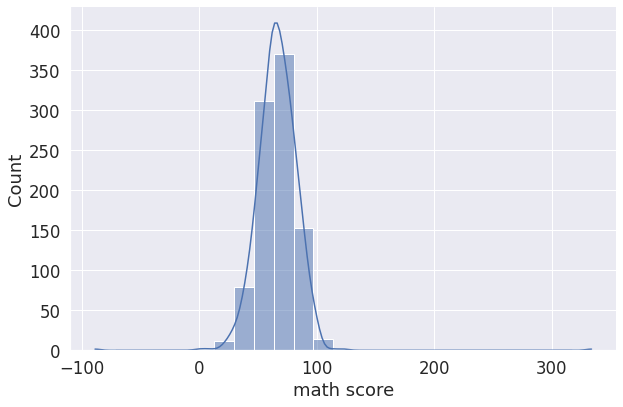

In [29]:
sns.displot(data=df['math score'],bins=25,height=6,kind='hist',aspect=1.5,kde=True)

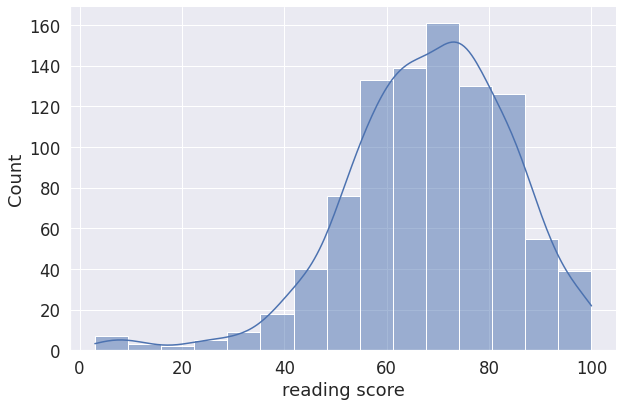

In [30]:
sns.displot(data=df['reading score'],bins=15,height=6,kind='hist',aspect=1.5,kde=True)

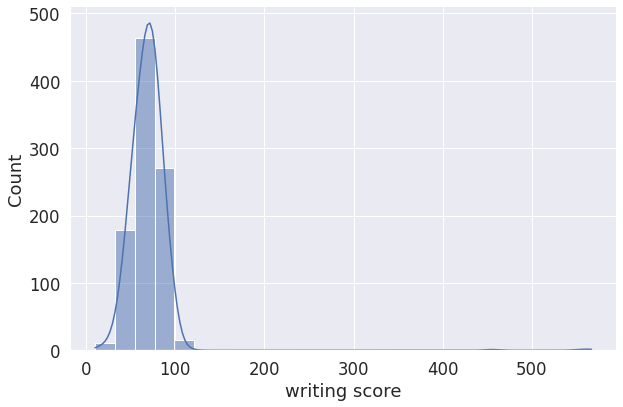

In [31]:
sns.displot(data=df['writing score'],bins=25,height=6,kind='hist',aspect=1.5,kde=True)

### Handling of Outliers

In [32]:
#As all the three scores have median ~ mode
#The data points which fall below mean-3*(std.dev.) or above mean+3*(std.dev.) are outliers.
#Z-Score Treatment
def trim(col:pd.core.series.Series):
    upperLimit = col.mean() + 3 * col.std()
    lowerLimit = col.mean() - 3 * col.std()
    newCol = col[(col < upperLimit) & (col > lowerLimit)]
    return newCol

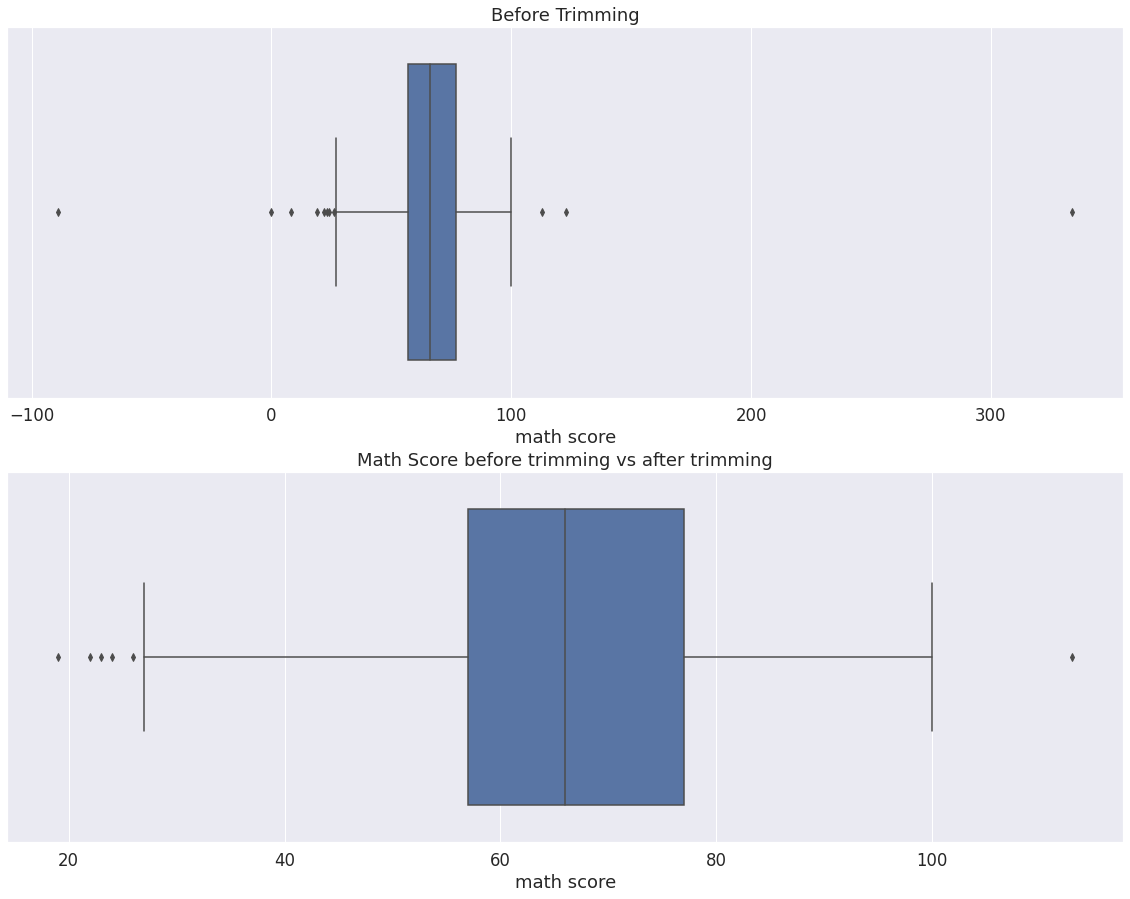

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.gca().set_title('Before Trimming')
sns.boxplot(data=df,x=df['math score'])
plt.subplot(2,1,2)
plt.gca().set_title('After Trimming')
sns.boxplot(data=df,x=trim(df['math score']))
plt.title("Math Score before trimming vs after trimming")
plt.show()


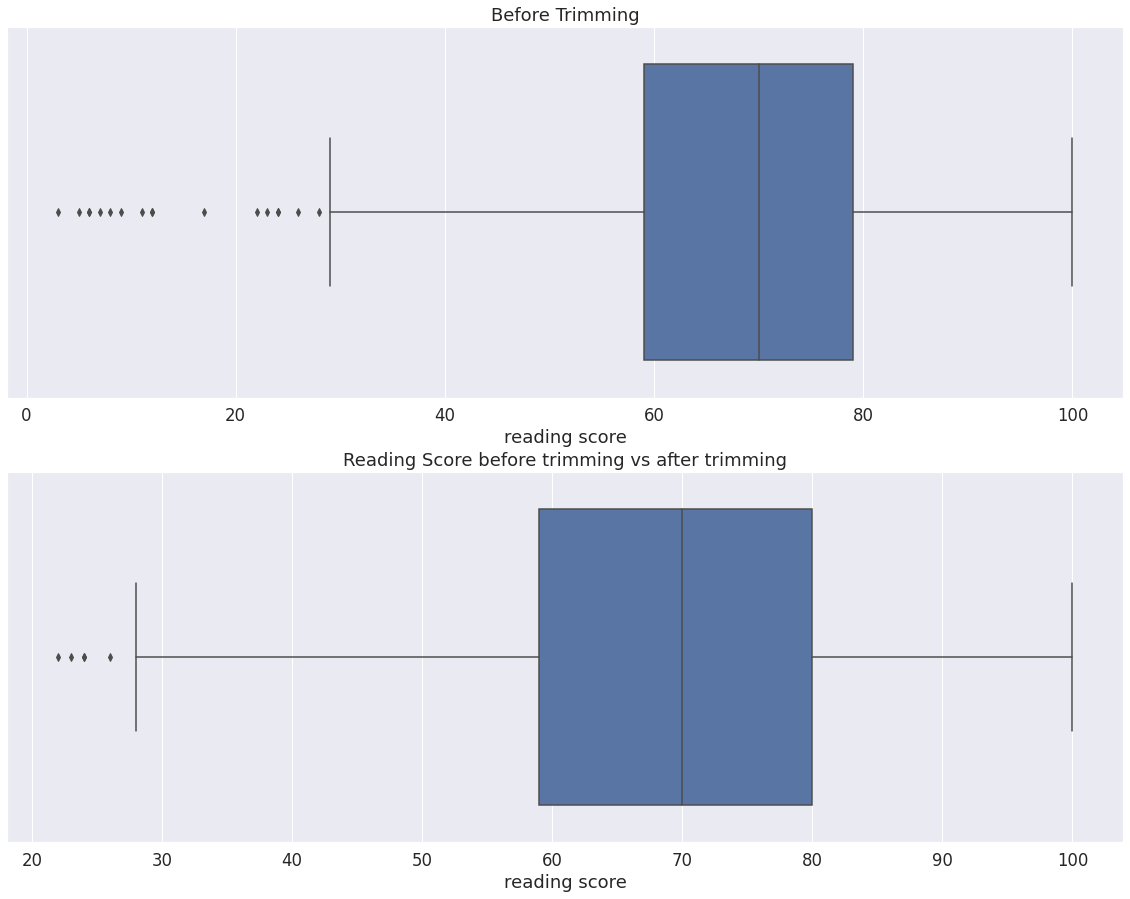

In [35]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.gca().set_title('Before Trimming')
sns.boxplot(data=df,x=df['reading score'])
plt.subplot(2,1,2)
plt.gca().set_title('After Trimming')
sns.boxplot(data=df,x=trim(df['reading score']))
plt.title("Reading Score before trimming vs after trimming")
plt.show()

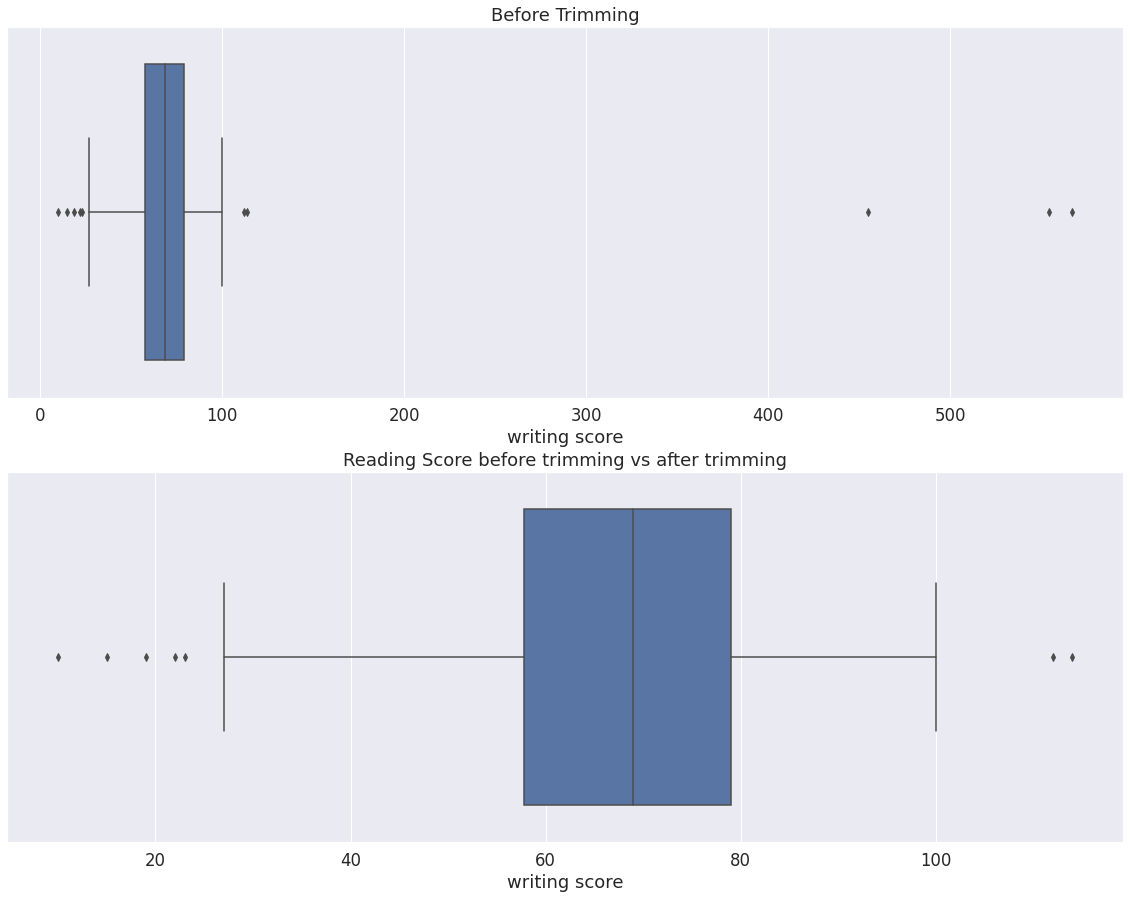

In [36]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.gca().set_title('Before Trimming')
sns.boxplot(data=df,x=df['writing score'])
plt.subplot(2,1,2)
plt.gca().set_title('After Trimming')
sns.boxplot(data=df,x=trim(df['writing score']))
plt.title("Reading Score before trimming vs after trimming")
plt.show()


In [62]:
newMathScores = trim(df['math score'])
med = newMathScores.median()
for index,value in df['math score'].iteritems():
    if not newMathScores.get(index):
        df.loc[index,'math score'] = med

In [63]:
newReadingScores = trim(df['reading score'])
med = newReadingScores.median()
for index,value in df['reading score'].iteritems():
    if not newReadingScores.get(index):
        df.loc[index,'reading score'] = med

In [64]:
newWritingScores = trim(df['writing score'])
med = newWritingScores.median()
for index,value in df['writing score'].iteritems():
    if not newWritingScores.get(index):
        df.loc[index,'writing score'] = med

In [66]:
df= pd.get_dummies(df)
df.head(10)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72.0,72.0,74.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69.0,90.0,88.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90.0,95.0,93.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47.0,57.0,44.0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76.0,78.0,75.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,71.0,83.0,78.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
6,88.0,95.0,92.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
7,40.0,43.0,39.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
8,64.0,64.0,67.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
9,38.0,60.0,50.0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


### Data Transformation

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()
new_df = df.copy()
col_names = ['math score','reading score','writing score']
features = new_df[col_names]

In [82]:
new_df[col_names] = scaler.fit_transform(features.values)
new_df[col_names].describe()

,math score,reading score,writing score
count,943.000000,943.000000,943.000000
mean,0.502403,0.605188,0.559599
std,0.159245,0.187310,0.147574
min,0.000000,0.000000,0.000000
25%,0.404255,0.474359,0.461538
50%,0.500000,0.615385,0.567308
75%,0.617021,0.730769,0.663462
max,1.000000,1.000000,1.000000


In [83]:
new_df.head(10)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.563830,0.641026,0.615385,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0.531915,0.871795,0.750000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,0.755319,0.935897,0.798077,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0.297872,0.448718,0.326923,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0.606383,0.717949,0.625000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,0.553191,0.782051,0.653846,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
6,0.734043,0.935897,0.788462,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
7,0.223404,0.269231,0.278846,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
8,0.478723,0.538462,0.548077,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
9,0.202128,0.487179,0.384615,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


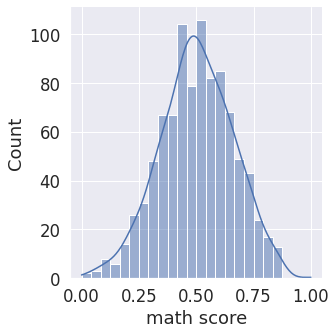

In [84]:
sns.displot(data=new_df['math score'],kde=True)

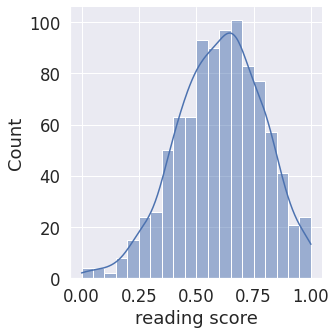

In [85]:
sns.displot(data=new_df['reading score'],kde=True)

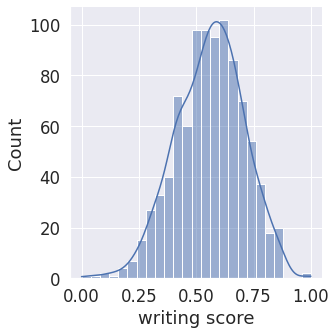

In [86]:
sns.displot(data=new_df['writing score'],kde=True)